# A7: Positron emission tomography

## About this notebook

This notebook will guide you through the analysis of data of your measurements on a simple PET laboratory setup. The notebook conains Python code that can analyze your data if you provide them in an appropriate format. 

Also, some steps of the analysis need your intervention, for example, you will have to provide your own initial parameters if a Gaussian fit goes wrong. 

You can also modify the tables and plots to your liking, omit some of them or introduce your own. The existing code provides a handy example of how to do some things in the notebook. 

The plots and tables provided by the notebook will help you, but you will have to draw final conclusions about the results. 

Outputs of the analysis are tables and plots that can be copied and pasted into your lab report, or you can submit the notebook with your data and conclusions in place of a lab report. 

 ### Dependencies

For the code to run, you may have to install some of the modules required by the notebook code to run. 

- Modules of the Python data analysis toolbox: `numpy`, `scipy`, `matplotlib`, `pandas`, `seaborn`
- Module for error propagation: `uncertainties` ([more information](https://pythonhosted.org/uncertainties/))
- Miscellaneous:
    - `jinja2` (for Pandas dataframe formatting)

If any modules are missing, install them manually with `pip install <module_name>` or `conda install <module_name>`.

In a Linux-like environment (or cloud) uncomment (remove the "# " at the start) and run }Ctrl + Enter) the following cell to install all the necessary dependencies. In a Windows environment, replace "!" with "%".

In [ ]:
# !pip install numpy scipy matplotlib jinja2 pandas seaborn uncertainties IPython

### How to run the code
You can run the code cell after cell by pressing `Shift+Enter` in each cell (this may vary according to the environment where you run the notebook: use the command appropriate for your environment). You can even repeatedly run a some cells, but this may not work at all times. If you run into problems, look for `Restart Kernel` or `Restart Kernel and Clear All output` or `Restart Kernel and Run All Cells` in the menu of your notebook environment, and use the appropriate command. 

You can also run all the notebook code at once. It will then use the sample data and run the whole analysis with default settings. You may use the sample data to learn how to use the notebook. 

#### User input
There are several things the user has to do to use the notebook:
- import data
- check quality of fits and modify initial fit parameters if necessary
- draw conclusions about the quality and consistency of the results

The sections where a user action is required are marked with the red caption <span style="color:red">Task</span>.

---
## Positron emission tomography

In a simplified form, this lab assignment introduces a very effective medical imaging menthod used in mediacal diagnostics as well as in medical research in neurology, oncology, cardiology and other areas of medicine.

The method localizes the origin of gamma photons arising as a result of annihilation of positrons introduced into the body by administration of a radioactive substance with electrons of atoms in the tissue. The configuration of the photon detection system enables 3D reconstruction of the distribution of the radioactive agent in the body. Thus PET provides images of tissues depending on their ability to uptake the radioactive agent rather than anatomical structures. 

The detectors are arranged on a ring enveloping the patient and detecti the outcoming annihilation photons. The detectors are fitted with a coincidence electronics so that only photons arriving at the detector from opposite directions at apprxoimately the same time are counted. Each pair of photons can then be used to construct a line through the body. Using a large number of such lines one can re-construct the distribution of positron sources in the volume of the body.

| **Isotope**   | $^{11}C$ | $^{13}N$ | $^{15}O$ | $^{18}F$ | 
| ------------- | -------- | -------- | -------- | -------- | 
| **Half-life** | 20 min   | 10 min   | 2 min    | 110 min  | 

The most frequent radionuclides for PET are incorporated into common metabolites such as glucose or water and administered to the patient. It is also possible to incorporate radionuclides into more complex molecules, such as drugs, and use PET to follow the path of the drug in the body (drug tracking).
### Positron annihilation

The positron is an antiparticle of the electron. It is not usually encountered in the observable nature since it quickly annihilates with an electron, which is one of the building stones of matter around us. During annihilation, both particles disappear and two annihilation photons arise. The positrons are emitted in $\beta^+$ decays of some radioisotopes. These positrons first dissipate their kinetic energy by scattering, predominantly on electrons in the surrounding matter. When their kinetic energy is close to zero, they annihilate with nearby electrons. It usually takes $10^{-7} - 10^{-10}$ s for an emitted positron to annihilate, and during that time it travels at most several tenths of millimeter. For example, $^{22}$Na emits positrons with energy at most 0.8 MeV and a positron with this energy can travel in water no further than 1 millimeter. Predominantly, two photoms arise in electron-positron annihilation. Provided that both the positron and electron have kinetic energy close to 0, the energy of annihilation pohotons is equal to the sum of rest masses of the positron and electron. Momentum conservation requires that the common momentum of photoms is practically zero, and so they must have equal but opposite momenta of 512 keV. The mean free path of such photoms in the tissue is several centimeters, and 7.2 cm in water. 
### Coincidence measurement
Concurrent physical phenomena can be studied by coincidence measurement. It is based on an electronic, coincidence block, that outputs a signal only if simultaneous impoulses arrive on inputs [3]. Coincidence of physical phenomena is blurred due to fluctuations of signal formation in detectors and time resolution of the coincidence electronics. The time resolution for coincidence measurement of two or more concurrent phenomena depemds primarily on the rate of signal formation in the detectors and reaches 10$^{-6}$ to 10$^{-12}$ s with up-to-date electronics. We call the coincidences arising from detection of both photons from an individual annihilation *true coincidences*. If two positrons annihilate by chance within the coincidence time window, we can detect a coincidence arising from annihhlations of two different positrons. Such coincidences are called *spurious*. The spurious coincidence rate $N_s$ can be calculated using the (uncorrelated) signal rates on two detectors, $N_1$ and $N_2$, and the width of the coincidence time window $\tau$:
$$
N_s = 2N_1N_2\tau
$$
or, for several detectors,
$$
N_s = 2^{n-1}N_1N_2\dots N_n\tau^{n-1}
$$

---
## Experiment setup
**Fig. 1** shows experiment setup and quantities used in the description of the experiment. Positron emitting $^22$Na sources are placed in a skull-shaped plastic holder. The skull is placed on a rotating stage on a table. To measure the vertical rotation with respect to the table, the skull is fitted with a protractor scale for a full 360$\degree$ range and a fixed arrow mark on the table. Two Na(TI) scintillation detectors A and B are used to detect annihilation photoms. The detectors are cylindrical, with 5 cm diameter and 5 cm height, and are placed about 15 cm from the rotation axis of the skull. Detector A is fixed to the table while detector B is mounted on a swivel arm allowing rotation around the skull axis. The position of detector B with respect to the table can be measured using a protractor scale on the table and a pointer on the swivel arm. 

The detectors have finite dimensions and finite angular resolution - they can detect photons arriving at an angle to the detector axis. The width of the acceptance angle range is call *angular resolution* and limits the precision of photon direction measurement.Signals from both detectors are - after amplification and discrimination - fed to a coincidence block and further to a coincidence counter. 

**Fig. 1** Posittron tomography

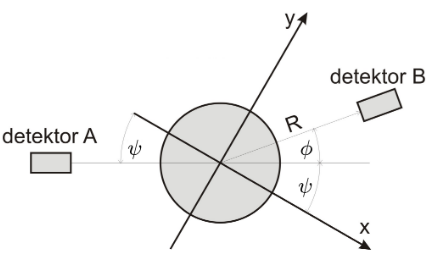

### Experiment geometry: Coordinate systems

**Fig. 1** shows the two coordinate systems in our experiment. The first is a polar coordinate system connected with the table, with origin coincident with the common vertical rotation axis of the skull and the swivel arm of detector B. In this system, the coordinates of detector A are (R, 180$\degree$) and coordinates of detector B are (R, $\phi$). The second system is cartesian and is connected with the skull model, its origin coincident with the rotation axis. We have to determine the position of the two positron sources with respect to this system. The coordinates of detectors A and B in the cartesian system of the model rotated by $\psi$ with respect to the table are
$$
\begin{align}
 x_A = - R \cos{\psi} \quad & \quad x_B = R \cos{(\psi + \phi)} \\
 y_A = - R \sin{\psi} \quad & \quad  y_B = R \sin{(\psi + \phi)} 
\end{align}
$$
In the skull system, the equation of the line connecting detectors A and B is
$$
(y_B - y_A)x - (x_B - x_A)y = (y_B - y_A)x_A - (x_B - x_A)y_A.
$$

---
## Task 1: Finding the position of a single positron source

For the following explanation, we assume that annihilation photons arise from a point source in opposite directions. Then we observe true coincidences when the source lies on the line connecting detectors A and B.

Rotate the model skull to $\psi_1 = 0\degree$ and measure coincidence rates in a sufficient range of angles $\phi$. The distribution will peak at a certain angle $\phi_1$. Then, we rotate the skull to $\psi_2 = 90\degree$ and again measure coincidence rates in a sufficient range of angles $\phi$. The distribution will peak at $\phi_2$. For ($\psi_1, \phi_1$) and ($\psi_2, \phi_2$) we get equations of two lines, 
$$
\begin{align}
a_{11}x + a_{12}y = b_1 \\
a_{21}x + a_{22}y = b_2.
\end{align}
$$
We can find the solution $(x,y)$ by solving the system using, for example, the Cramer's rule. This solution is an estimate of the source position with respect to the skull model.

### Measurement with a single positron source

1. The instructor will place a $^{22}$ Na source into the skull model. Measure the angular distribution of coincidence rate in the range of angles $\phi$ and $\psi$ needed to find the position of the source. Set accumulation time to 20 s.
2. Explain the form of the measured angular distribution of coincindence rates. Estimate positron source position using a graphical method - by drawing lines and finding their intersections.

The data expected for the first task are dependencies of coincidence rates on the angle between detectors $\phi$ for several values of skull rotation $\psi$. Here we read the data from a data file, but it is easy to read data also from a string entered in a cell in this notebook.

We first do some initialization and explain how to import your measured data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [ ]:
# Set the notebook directory
# TODO this may need fixing
A7_home = "."

**Skull data**

Here we prepare data for an image of the skull that we will use to show our results.

In [ ]:
# Read skull data from file for future use
data_x = []
data_y = []
with open(A7_home + "/skull_x_y.txt", "r") as infile:
    for line in infile:
        x, y = [float(s) for s in line.split()]
        data_x.append(x)
        data_y.append(y)
skull_data = pd.DataFrame({"x": data_x, "y": data_y})

### <span style="color:red">Task</span>
Import your data into the notebook.

For processing in this notebook, data for each task are expected in a simple tab-delimited text format as follows>
```
psi	phi	 N
0	-35	 5
0	-31	 9
...
90	-31	 5
90	-27	 3
...
120	-14	 5
120	-18	 7
... 
```

You can prepare the table in MS Excel or any text editor. When done, save the data to tab-delimited text format and modify the following cell to give proper path relative to the notebook directory and filename. 

**Important**

Observe the naming of columns in the table. You would have to change a lot of code to make the notebook work with different column names, so stay with this internal naming. You will have a much wider freedom about names that appear in tables or plots. 

In [ ]:
data_dir = A7_home + "/sample_data/set_A"   # Change this to the directory where you have the data
data_file = data_dir + "/Task1.txt"         # Change this to the actual name of the file containing the data

# Read the data of a single source angular profile from a file and convert to a pandas dataframe
data_1 = pd.read_table(data_file, sep = "\t")
print(data_1.head())
data_1["err"] = np.sqrt(data_1["N"])    # compute uncertainties in counts

**Alternatively**, you can copy the table from Excel or a text editor and paste it directly in the code cell below.  
Uncomment the last three lines of code and execute the cell to convert the data to a Pandas dataframe.

In [ ]:
from io import StringIO

data_str = """
psi	phi	N
0	-35	5
0	-31	9
0	-27	6
0	-23	6
0	-19	30
0	-17	57
0	-15	79
0	-13	117
0	-11	148
0	-9	127
0	-7	139
0	-5	119
0	-3	99
0	-1	83
0	1	58
0	5	17
0	9	3
90	-31	5
90	-27	3
90	-23	9
90	-19	40
90	-17	51
90	-15	84
90	-13	95
90	-11	144
90	-9	162
90	-7	149
90	-5	146
90	-3	157
90	-1	125
90	1	109
90	3	63
90	5	44
90	7	19
90	11	10
90	15	6
"""
# UNCOMMENT THE FOLLOWING LINE TO READ THE DATA FROM A STRING
# data_1 = pd.read_table(StringIO(data_str), sep = "\t")
# print(data_1.head())
# data_1["err"] = np.sqrt(data_1["N"])    # compute uncertainties in counts

### Fit data

We fit the datasets measured for each value of $\psi$ to a gaussian:
$$
f(\phi) = bg + amp \cdot \exp\left[-{1\over2}\left({\phi-mean}\over{width}\right)^2\right]
$$
We fit the data, print a table of results and do some plots so that we can check and document the fit quality. 

In [ ]:
from scipy.optimize import curve_fit

def gauss_plus_background(x, bg, amp, mean, w):
    """
    Function returning a gaussian with flat background, 
    Meaning of parameters is clear from the definition.
    """
    return bg + amp * np.exp(- 1/2 * ((x-mean)/w)**2)

psi_vals = data_1["psi"].unique() # how many psi values were used
fits = dict.fromkeys(psi_vals)
for psi in psi_vals:
    data_psi = data_1[data_1["psi"] == psi]
    p_opt, p_cov = curve_fit(gauss_plus_background, data_psi["phi"].values, data_psi["N"].values, p0 = [0, max(data_psi["N"]), 0, 20], 
                                   sigma = data_psi["err"].values, absolute_sigma = True)
    p_err = np.sqrt(np.diag(p_cov))
    errXerr = np.outer(p_err, p_err)
    p_corr = p_cov / errXerr
    fits[psi] = {"parameters": p_opt, "par_errors": p_err, "correlations" : p_corr}

# TODO: Label formatting: LaTeX works in matplotlib labels, but not in pandas tables. 
# Unicode works in pandas tables, but not in matplotlib labels.
fits_table = pd.DataFrame({
    "𝜓 (⁰)" : psi_vals,
    "bg" : [fits[psi]["parameters"][0] for psi in psi_vals],
    "s(bg)" : [fits[psi]["par_errors"][0] for psi in psi_vals],
    "amp" : [fits[psi]["parameters"][1] for psi in psi_vals],
    "s(amp)" : [fits[psi]["par_errors"][1] for psi in psi_vals],
    "mean (⁰)" : [fits[psi]["parameters"][2] for psi in psi_vals],
    "s(mean) (⁰)" : [fits[psi]["par_errors"][2] for psi in psi_vals],
    "width (⁰)" : [fits[psi]["parameters"][3] for psi in psi_vals],
    "s(width) (⁰)" : [fits[psi]["par_errors"][3] for psi in psi_vals]
})
fits_table.style.format(precision = 2).set_caption("Parameters of Gaussian fits to  profiles of coincidence rates")

In [ ]:
def add_fitted_to_data(data):
    '''
    Adds fitted values and residuals to data points.
    Also adds chi2 and df to the fits dictionary.
    '''
    result = data.copy()
    psi = np.mean(result["psi"])
    parameters = fits[psi]["parameters"]
    result["N_fit"] = gauss_plus_background(data["phi"], *parameters)
    result["residual"] = (result["N"] - result["N_fit"]) / np.sqrt(result["N_fit"])
    fits[psi]["chisq"] = sum(r**2 for r in result["residual"]) # Side effect!
    nrow, ncol = data.shape
    fits[psi]["df"] = nrow - 4
    return result

data_1 = data_1.groupby("psi")[["psi", "phi", "N", "err"]].apply(add_fitted_to_data)
data_1.index = data_1.index.droplevel("psi")
print(data_1.head())

In [ ]:
def make_fine_plot(data):
    '''
    Data to draw a fitted function plot
    '''
    psi = np.mean(data["psi"])
    parameters = fits[psi]["parameters"]
    x = np.linspace(min(data["phi"]), max(data["phi"]), 100)
    y = gauss_plus_background(x, *parameters)
    return pd.DataFrame({"psi": np.repeat(psi, 100), "phi": x, "N_fit": y})

fine_data = data_1.groupby("psi")[["psi", "phi", "N_fit"]].apply(make_fine_plot)

sns.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize=(8.5, 6.5))
sns.scatterplot(data = data_1, x = "phi", y = "N", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
sns.lineplot(data = fine_data, x = "phi", y = "N_fit", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax, legend = False)
plt.xlabel("$\\phi\\,(\\degree)$")
plt.legend(title = "$\\psi\\,(\\degree)$")
plt.title("Gaussian fits to angular profiles of coincidence rates: single source")

### Diagnostic plots

We have a table of fits and plot of data and fit, but we also need to see if our fit was good. Therefore we add two more diagnostic plots - normalized residuals and QQ-plot.

In [ ]:
fig, ax = plt.subplots(figsize = [8.5, 2.5])
sns.lineplot(data = data_1, x = "phi", y = "residual", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), dashes = True, ax = ax)
plt.xlabel("$\\phi\\,(\\degree)$")
plt.legend(title = "$\\psi\\,(\\degree)$")
plt.title("Residuals of gaussian fits to angular profiles")

In [ ]:
from scipy.stats import norm

def make_QQ_data(data):
    psi = np.mean(data["psi"]).astype(int)
    y = np.sort(data["residual"])
    mean, std = np.mean(y), np.std(y)
    ppf = norm(loc=mean, scale=std).ppf # Inverse CDF
    N = len(y)
    x = [ppf(i / (N+2)) for i in range(1,N+1)]
    nrow, ncol = data.shape
    return pd.DataFrame({"psi": np.repeat(psi, nrow), "x": x, "y": y})

qq_data = data_1.groupby("psi")[["psi", "residual"]].apply(make_QQ_data)
   
fig, ax = plt.subplots(figsize = [8.5, 8.5])
sns.scatterplot(data = qq_data, x = "x", y = "y", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
sns.lineplot(data = qq_data, x = "x", y = "x", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax, legend = False)

# Add labels
plt.xlabel('Normal quantiles')
plt.ylabel('Sample quantiles')
plt.legend(title = "$\\psi\\,(\\degree)$")
plt.title("QQ plot for gaussian fits to angular profiles")

### Calculate the position of the positron source

We start by converting fit parameters to (correlated) random variables defined in the `uncertainties` module. With these we then do all the calculations so that we keep track of uncertainties along the way. We construct lines and their crossings, and make tables and plots as a guide to what are the results and as a material to include in a lab report. 

In [ ]:
from uncertainties import *
import uncertainties.umath as umath

R = ufloat(15,0.5) # We are not sure about the correct value, but the uncertainty translates directly to uncertainties in estimated positions

def to_xy(R, psi, phi):
    """
    For given angle positions of the skull and the movable detector arm gives 
    xy positions of centers of detector A and detector B.
    """
    rad = 3.1415926 / 180.0
    return -R * umath.cos(psi * rad),\
        -R * umath.sin(psi * rad),\
        R * umath.cos(psi * rad + phi * rad),\
        R * umath.sin(psi * rad + phi * rad)

# Covnert fit parameters to random variables and set their correlations.
# This will help us propagate parameter uncertainties through calculations.

rv_fits = {} # contains line points as random variables
par_names = ["bg", "amp", "mean", "std"]
for psi, fit in fits.items():
    rv_list = []
    for par, err in zip(fit["parameters"], fit["par_errors"]):
        rv_list.append((par, err))
    rv_list = correlated_values_norm(rv_list, fit["correlations"])
    rv_fits[psi] = {par_names[i]: rv_list[i] for i in range(len(rv_list))}

In [ ]:
points = {} # collecting random variables
points_records = [] # collecting for table

for psi, par in rv_fits.items():
    ax, ay, bx, by = to_xy(R, psi, par["mean"])
    points[psi] = {"A": (ax, ay), "B": (bx, by)}
    points_records.append({
        "𝜓 (°)" : psi,
        "AB" : "A", 
        "x (cm)" : ax.nominal_value, 
        "𝑠ₓ (cm)" : ax.std_dev, 
        "y (cm)" : ay.nominal_value, 
        "𝑠ᵧ (cm)" : ay.std_dev,
    })
    points_records.append({
        "𝜓 (°)" : psi,
        "AB" : "B", 
        "x (cm)" : bx.nominal_value, 
        "𝑠ₓ (cm)" : bx.std_dev, 
        "y (cm)" : by.nominal_value, 
        "𝑠ᵧ (cm)" : by.std_dev,
    })

points_table = pd.DataFrame.from_records(points_records)

points_table.style.format(precision=2).set_caption("Estimated positions of detectors A and B")


In [ ]:
# X-points of pairs of lines: size-2 combinations of all psi measurements
from itertools import combinations

X_points = [] # for random variables
rows = [] # for a table
for psi1, psi2 in combinations(psi_vals, 2):
    ax1, ay1 = points[psi1]["A"]
    bx1, by1 = points[psi1]["B"]
    ax2, ay2 = points[psi2]["A"]
    bx2, by2 = points[psi2]["B"]
    a = by1 - ay1
    b = - bx1 + ax1
    c = a * ax1 + b * ay1
    d = by2 - ay2
    e = - bx2 + ax2
    f = d * ax2 + e * ay2
    Det = e * a - b * d
    x, y = (c * e - b * f)/Det, (a * f - c * d) / Det
    rows.append({
        "ψ₁ (⁰)": psi1, 
        "ψ₂ (⁰)": psi2, 
        "x (cm)": x.nominal_value, "𝑠ₓ (cm)": x.std_dev, "y (cm)": y.nominal_value, "𝑠ᵧ (cm)": y.std_dev
    })
    X_points.append(((c * e - b * f)/Det, (a * f - c * d) / Det))

X_table = pd.DataFrame.from_records(rows)

X_table.style.format(precision = 2).set_caption("Estimated crossing of lines through detectors")

The following function constructs a confidence ellipse for a pair of uncertainties random variables x and y. 

In [ ]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=1.0, facecolor='none', **kwargs):
    """
    Create a plot of the confidence ellipse of *x* and *y*.
   :param x, y : uncertainties random variables (scalar)
   :param ax matplotlib.axes.Axes The Axes object to draw the ellipse into.
   :param n_std : float The number of standard deviations to determine the ellipse's radiuses.
   :param **kwargs Forwarded to `~matplotlib.patches.Ellipse`
   :return matplotlib.patches.Ellipse The ellipse object.
    """
  
    cov = correlation_matrix([x, y])
    pearson = cov[0, 1]
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculate the standard deviation of x from the square root of the variance and multiply
    # with the given number of standard deviations.
    scale_x = x.std_dev * n_std
    mean_x = x.nominal_value

    # calculate the standard deviation of y ...
    scale_y = y.std_dev * n_std
    mean_y = y.nominal_value

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

We can now draw the skull and plot the lines connecting detectors A and B and their crossing.

In [ ]:
fig, ax = plt.subplots(figsize = [8.5, 8.5])
sns.lineplot(data = points_table, x = "x (cm)", y = "y (cm)", hue = "𝜓 (°)", linewidth = 0.4,
             palette = sns.color_palette("husl", len(psi_vals)))
ax.scatter(skull_data["x"], skull_data["y"], marker = ".")
confidence_ellipse(X_points[0][0], X_points[0][1], ax, n_std = 2, 
                   edgecolor = "black", linewidth = 0.5)
ax.set_aspect("equal")
plt.xlabel("x (cm)")
plt.xlim([-9, 9])
plt.ylabel("y (cm)")
plt.ylim([-6,6])
plt.legend(title = "$\\psi$ (⁰)")
plt.title("Estimating the position of a single gamma source")

### <span style="color:red">Concluding tasks:</span>

Now it is your turn to draw proper conclusions from the measurement. 

- Was the Gaussian fit good? Can it be imporoved? (The sign of a bad fit is a large confidence ellipse)
- Are the profiles Gaussian or is there a substantial deviation from gaussianity? Why?
- What is the precision of the measurement? Can we rely on errors of fit parameters?
- How can we improve the precision? Which would you prefer to get a better estimate of measurement precision:
    - Add another angular profile (measurement at another $\psi$), or
    - Measure angular profiles more thoroughly (longer axquisition time, smaller angular step)?

---
## Task 2: Finding the position of two positron sources

In the case of N positron sources, we will observe N (possibly overlapping) peaks in the angular distributions for each angle $\psi$. To distinguish peaks from individual sources, we need N angular distributions for angles $\psi_1, \psi_2, \dots \psi_N$. The problem is that we now have N lines between detectors A and B, and there are $N(N-1)/2$ crossings, of which we need to identify the N crossings that correspond to positions of sources. Those crossings will be N-fold crossings, but we may not be able to identify them due to measurement error. There are several methods to solve this problem:
1. Some lines may cross outside of the skull and such crossings may be safely ignored.
2. If the sources have different activities, we may be able to identify peaks in angular distributions belonging to individual sources.
3. In this notebook, we will use confidence regions for corssings to identify those that are congruent within measurement error. 

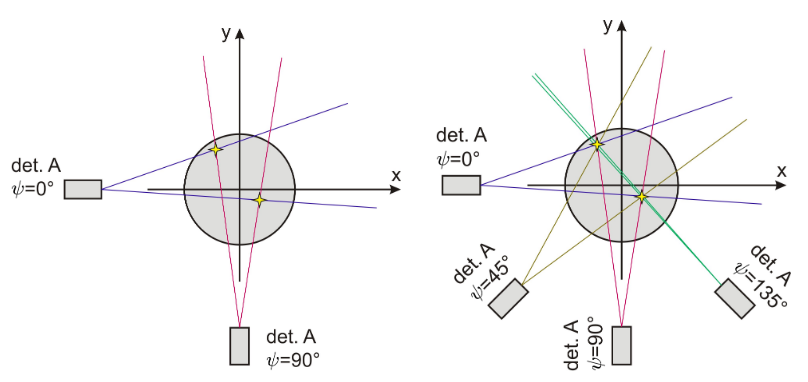

### Measurement with two positron sources

1. After the instructor placed the second positron source into the skull model, measure the angular distribution of coincidence rate in the appropriate range of angles $\phi$ for at least 3 positons of the skull ($\psi$ values) to find the position of both sources. Accumulation ion time 20 s.
2. Use a ruler to fund approximate position of both positron sources.
3. Continue with this notebook for a detailed analysis.


We follow the same path: read data and make fits.

#### <span style="color:red">Task</span>

Import the data that you measured as a file or paste them into a [cell below](#paste_data_2sources)

In [ ]:
data_2 = pd.read_table(data_dir + "/Task2.txt", sep = "\t")
data_2["err"] = np.sqrt(data_2["N"])
print(data_2.head())

Alternatively, you can paste the data into the following cell, uncomment the three lines of code at the bottom and execute the cell.
<a id="paste_data_2sources"></a>

In [ ]:
data_str = """
psi	phi	N
0	-35	6
0	-30	6
0	-25	7
0	-20	25
0	-15	97
0	-10	126
0	-5	140
0	0	72
0	5	43
0	10	28
0	15	101
0	20	189
0	25	189
0	30	133
0	35	51
0	40	14
90	-35	8
90	-30	6
90	-25	7
90	-20	39
90	-15	132
90	-10	276
90	-5	296
90	0	222
90	5	76
90	10	17
90	15	10
90	20	8
90	25	4
90	30	3
90	35	7
90	40	7
120	-35	15
120	-30	30
120	-25	96
120	-20	165
120	-15	195
120	-10	195
120	-5	158
120	0	167
120	5	94
120	10	54
120	15	27
120	20	5
120	25	3
120	30	8
120	35	5
120	40	9
"""
# UNCOMMENT the following code if you want to read the data from a string
# data_2 = pd.read_table(StringIO(data_str), sep = "\t")
# print(data_2.head())
# data_2["err"] = np.sqrt(data_2["N"])    # compute uncertainties in counts

Fits are somewhat complicated, because we sometimes have a clearly bimodal distribution and sometimes the two peaks may overlap.

If a fit comes out bad, look at the plot below and edit the initial conditions to match what you see in the plot.

In [ ]:
psi_vals = data_2["psi"].unique() # Replace psi with these values

fig, ax = plt.subplots(figsize=(8.5, 6.5))
sns.scatterplot(data = data_2, x = "phi", y = "N", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
plt.xlabel("$\\phi$ (⁰)")
plt.legend(title = "$\\psi$ (⁰)")
plt.title("Angular profiles of coincidence rates, 2 sources")

<a id="set_2fit_initials"></a>
#### <span style="color:red">Task</span>
Look at the plot above carefully and try to make a good initial guess of the fit parameters.
- Edit the `initial_guess_str` string in the following cell and re-run the rest of the notebook. 
- You need not care about $\psi$ values, they will be inferred from the data. Only the number of rows and columns matters.
- If you want a single Gaussian fit, set the amplitude of the second component, `amp2`, to zero.

In [ ]:
initial_guess_str = '''
psi bg amp1 mean1 width1 amp2 mean2 width2
psi1 5 100 -15 6 100 5 6
psi1 5 100 -5 6 0 5 6
psi1 5 100 -15 6 100 5 6
'''
psi_vals = data_2["psi"].unique() # Replace psi with these values
initial_guess = pd.read_csv(StringIO(initial_guess_str), sep = " ")
initial_guess["psi"] = psi_vals
initial_guess = initial_guess.set_index("psi")
initial_guess = initial_guess.sort_index()  # Sorting the DataFrame by the index (psi) for clarity
initial_guess = initial_guess.reset_index()
initial_guess.style.format(precision=2).set_caption("Parameters of fits to angular profiles of coincidence rates")

In [ ]:
def double_gauss_plus_background(x, bg, amp1, mean1, sig1, amp2, mean2, sig2):
    """
    Function returning a double gaussian with flat background, 
    Meaning of parameters is clear from the definition.
    """
    return bg + amp1 * np.exp(- 1/2 * ((x-mean1)/sig1)**2) + amp2 * np.exp(- 1/2 * ((x-mean2)/sig2)**2)

fits = dict.fromkeys(psi_vals)
for psi in psi_vals:
    data_psi = data_2[data_2["psi"] == psi]
    mid = np.sum(data_psi["phi"] * data_psi["N"]) / np.sum(data_psi["N"])
    top = max(data_psi["N"])
    bounds = ([0, 0,-np.inf, 0, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
    x_scale = (5, 200, 20, 7, 200, 20, 7)
    initial_guess_psi = initial_guess[initial_guess["psi"] == psi].values[0][1:] 
    if initial_guess_psi[4] != 0: # Two component fit is requested
        try:
            p_opt, p_cov = curve_fit(double_gauss_plus_background, data_psi["phi"].values, data_psi["N"].values, 
                        p0 = initial_guess_psi, 
                        sigma = data_psi["err"].values, absolute_sigma = True, bounds = bounds, x_scale = x_scale)
        except (RuntimeError, ValueError, OptimizeWarning) as e:
            print(e)
            print("Reverting to single fit for psi = ", psi)
            bounds = (bounds[0][:4], bounds[1][:4])
            x_scale = x_scale[:4]
            p_opt, p_cov = curve_fit(gauss_plus_background, data_psi["phi"].values, data_psi["N"].values, 
                        p0 = initial_guess_psi[:4],
                        sigma = data_psi["err"].values, absolute_sigma = True)
    else:
        bounds = (bounds[0][:4], bounds[1][:4])
        x_scale = x_scale[:4]
        p_opt, p_cov = curve_fit(gauss_plus_background, data_psi["phi"].values, data_psi["N"].values, 
                        p0 = initial_guess_psi[:4], 
                        sigma = data_psi["err"].values, absolute_sigma = True) 

    p_err = np.sqrt(np.diag(p_cov))
    errXerr = np.outer(p_err, p_err)
    p_corr = p_cov / errXerr
    if len(p_opt) == 4:
        p_opt = np.asarray([*p_opt, None, None, None])
        p_err = np.asarray([*p_err, None, None, None])
    fits[psi] = {"parameters": p_opt, "par_errors": p_err, "correlations" : p_corr}

# No units in the header, since the table would be too broad.
fits_table = pd.DataFrame({
    "𝜓 (°)" : psi_vals,
    "bg" : [fits[psi]["parameters"][0] for psi in psi_vals],
    "𝑠₍bg₎" : [fits[psi]["par_errors"][0] for psi in psi_vals],
    "amp1" : [fits[psi]["parameters"][1] for psi in psi_vals],
    "𝑠(amp1)" : [fits[psi]["par_errors"][1] for psi in psi_vals],
    "mean1" : [fits[psi]["parameters"][2] for psi in psi_vals],
    "𝑠(mean1)" : [fits[psi]["par_errors"][2] for psi in psi_vals],
    "width1" : [fits[psi]["parameters"][3] for psi in psi_vals],
    "𝑠(width1)" : [fits[psi]["par_errors"][3] for psi in psi_vals],
    "amp2" : [fits[psi]["parameters"][4] for psi in psi_vals],
    "𝑠(amp2)" : [fits[psi]["par_errors"][4] for psi in psi_vals],
    "mean2" : [fits[psi]["parameters"][5] for psi in psi_vals],
    "𝑠(mean2)" : [fits[psi]["par_errors"][5] for psi in psi_vals],
    "width2" : [fits[psi]["parameters"][6] for psi in psi_vals],
    "𝑠(width2)" : [fits[psi]["par_errors"][6] for psi in psi_vals]
})
fits_table.style.format(precision = 2).set_caption("Parameters of fits to angular profiles of coincidence rates")

In [ ]:
def add_fitted_to_data(data):
    '''
    Adds fitted values and residuals to data points.
    Also adds chi2 and df to the fits dictionary.
    '''
    result = data.copy()
    psi = np.mean(result["psi"])
    parameters = fits[psi]["parameters"]
    if parameters[4] is None:
        result["N_fit"] = gauss_plus_background(data["phi"], *parameters[:4])
    else:
        result["N_fit"] = double_gauss_plus_background(data["phi"], *parameters)
    result["residual"] = (result["N"] - result["N_fit"]) / np.sqrt(result["N_fit"])
    fits[psi]["chisq"] = sum(r**2 for r in result["residual"]) # side effect !
    nrow, ncol = data.shape
    fits[psi]["df"] = nrow - len(parameters)
    return result

data_2 = data_2.groupby("psi")[["psi", "phi", "N", "err"]].apply(add_fitted_to_data)
data_2.index = data_2.index.droplevel("psi")
print(data_2.head())

In [ ]:
def make_fine_plot(data):
    '''
    Data to draw a fitted function plot
    '''
    psi = np.mean(data["psi"]).astype(int)
    parameters = fits[psi]["parameters"]
    x = np.linspace(min(data["phi"]), max(data["phi"]), 100)
    if parameters[4] is None:
        y = gauss_plus_background(x, *parameters[:4])
    else:
        y = double_gauss_plus_background(x, *parameters)
    return pd.DataFrame({"psi": np.repeat(psi, 100), "phi": x, "N_fit": y})

fine_data = data_2.groupby("psi")[["psi", "phi", "N_fit"]].apply(make_fine_plot)

fig, ax = plt.subplots(figsize=(8.5, 6.5))
sns.scatterplot(data = data_2, x = "phi", y = "N", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
sns.lineplot(data = fine_data, x = "phi", y = "N_fit", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax, legend = False)
plt.xlabel("ψ (⁰)")
plt.legend(title = "ψ (⁰)")
plt.title("Gaussian fits to angular profiles of coincidence rates")

### Diagnostic plots

We have a table of fits and plot of data and fit, but we also need to see if our fit was good. Therefore we add two more diagnostic plots - normalized residuals and QQ-plot.

In [ ]:
fig, ax = plt.subplots(figsize = [8.5, 2.5])
sns.lineplot(data = data_2, x = "phi", y = "residual", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), dashes = True, ax = ax)
plt.xlabel("$\\phi$ (⁰)")
plt.legend(title = "$\\psi$ (⁰)")
plt.title("Residuals of gaussian fits to angular profiles")

In [ ]:
def make_QQ_data(data):
    psi = np.mean(data["psi"]).astype(int)
    y = np.sort(data["residual"])
    mean, std = np.mean(y), np.std(y)
    ppf = norm(loc=mean, scale=std).ppf # Inverse CDF
    N = len(y)
    x = [ppf(i / (N+2)) for i in range(1,N+1)]
    nrow, ncol = data.shape
    return pd.DataFrame({"psi": np.repeat(psi, nrow), "x": x, "y": y})

qq_data = data_2.groupby("psi")[["psi", "residual"]].apply(make_QQ_data)
   
fig, ax = plt.subplots(figsize = [8.5, 8.5])
sns.scatterplot(data = qq_data, x = "x", y = "y", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax)
sns.lineplot(data = qq_data, x = "x", y = "x", hue = "psi", palette = sns.color_palette("husl", len(psi_vals)), ax = ax, legend = False)

# Add labels
plt.xlabel('Normal quantiles')
plt.ylabel('Sample quantiles')
plt.legend(title = "ψ (⁰)")
plt.title("QQ plot for gaussian fits to angular profiles")

#### <span style="color:red">Task</span>

Is the fit good? 

If not, return [back](#set_2fit_initials) and try setting better initial parameters for the fit. 

**A good fit**
- 95 % of normalized residuals are between -2 and 2
- standard errors of parameters are reasonably low }i. e., *not* several times larger than the parameter value)

With a bad fit, the usual remedy is to make the fit use a single Gaussian rather than two if the data don't support two Gaussian components. 


### Calculate the positions of positron sources

We start by converting fit parameters to (correlated) `uncertainties` random variables. With these we then do all the calculations so that we keep track of uncertainties along the way. We construct lines and their crossings, and make tables and plots as a guide to what are the results and as a material to include in a lab report. 

*Note*: Below, the two positions of detector B corresponding to two gaussian peaks are denoted as B and C.

In [ ]:
rv_fits = {} # contains line points as random variables
par_names = ["bg", "amp1", "mean1", "std1", "amp2", "mean2", "std2"]
for psi, fit in fits.items():
    rv_list = []
    for par, err in zip(fit["parameters"], fit["par_errors"]):
        if par:
            rv_list.append((par, err))
    rv_list = correlated_values_norm(rv_list, fit["correlations"])
    rv_fits[psi] = {par_names[i]: rv_list[i] for i in range(len(rv_list))}


In [ ]:
points = {} # to collect random vaariables
records = [] # to collect data for a table

for psi, par in rv_fits.items():
    # Order here is CAB or AB, depending on whether we have two peaks or one
    # Simplifies line plotting. 
    try:
        ax, ay, cx, cy = to_xy(R, psi, par["mean2"])
        records.append({
            "ψ (⁰)" : psi,
            "ABC" : "C",
            "x (cm)" : cx.nominal_value,
            "𝑠ₓ (cm)" : cx.std_dev,
            "y (cm)" : cy.nominal_value,
            "𝑠ᵧ (cm)" : cy.std_dev
        })
        points[psi] = {"C": (cx, cy)}
        C_str = f"C: x={cx.nominal_value:.2f}+/-{cx.std_dev:.2f}, y={cy.nominal_value:.2f}+/-{cy.std_dev:.2f}"
    except KeyError:
        points[psi] = {}  
        C_str = ""
    ax, ay, bx, by = to_xy(R, psi, par["mean1"])
    records.append({
            "ψ (⁰)" : psi,
            "ABC" : "A",
            "x (cm)" : ax.nominal_value,
            "𝑠ₓ (cm)" : ax.std_dev,
            "y (cm)" : ay.nominal_value,
            "𝑠ᵧ (cm)" : ay.std_dev
        })
    records.append({
            "ψ (⁰)" : psi,
            "ABC" : "B",
            "x (cm)" : bx.nominal_value,
            "𝑠ₓ (cm)" : bx.std_dev,
            "y (cm)" : by.nominal_value,
            "𝑠ᵧ (cm)" : by.std_dev
        })
    points[psi].update({"A": (ax, ay), "B": (bx, by)})
    
points_table = pd.DataFrame.from_records(records)
points_table.sort_values(by = ["ψ (⁰)", "ABC"])\
    .style.format(precision = 2)\
    .set_caption("Estimated positions of detectors A and B/C")

In [ ]:
# lines connecting AB and AC for each psi
lines = {}
for psi in psi_vals:
    ax1, ay1 = points[psi]["A"]
    bx1, by1 = points[psi]["B"]
    a = by1 - ay1
    b = - bx1 + ax1
    c = a * ax1 + b * ay1
    lines[psi] = {"AB" : (a, b, c)}
    try:
        cx1, cy1 = points[psi]["C"]
    except KeyError:
        continue
    aa = cy1 - ay1
    bb = - cx1 + ax1
    cc = aa * ax1 + bb * ay1
    lines[psi]["AC"] = (aa, bb, cc)

# X-points of pairs of lines: size-2 combinations of all psi measurements
from itertools import product
rows = []
X_points = []
for psi1, psi2 in combinations(psi_vals, 2):
    for bc1, bc2 in product("BC", repeat=2):
        try: # some 2G fits may have failed
            ax1, ay1 = points[psi1]["A"]
            bx1, by1 = points[psi1][bc1]
            ax2, ay2 = points[psi2]["A"]
            bx2, by2 = points[psi2][bc2]
        except KeyError:
            continue
        a = by1 - ay1
        b = - bx1 + ax1
        c = a * ax1 + b * ay1
        d = by2 - ay2
        e = - bx2 + ax2
        f = d * ax2 + e * ay2
        Det = e * a - b * d
        x = (c * e - b * f) / Det
        y = (a * f - c * d) / Det
        rho = correlation_matrix([x,y])[0,1]
        rows.append({
            "ψ₁ (⁰)": psi1, 
            "BC1": bc1, 
            "ψ₂ (⁰)": psi2, 
            "BC2": bc2, 
            "x (cm)" : x.nominal_value, 
            "sₓ (cm)" : x.std_dev, 
            "y (cm)" : y.nominal_value, 
            "sᵧ (cm)" : y.std_dev, 
            "ρ" : rho
        })
        X_points.append((x, y))

X_table = pd.DataFrame.from_records(rows)
X_table.style.format(precision = 2).set_caption("Estimated crossing of lines through detectors")

We can now draw the skull and plot the lines connecting detectors A and B and their crossing.

In [ ]:
fig, ax = plt.subplots(figsize = [8.5, 8.5])
sns.lineplot(data = points_table, x = "x (cm)", y = "y (cm)", hue = "ψ (⁰)", 
             sort = False, palette = sns.color_palette("husl", len(psi_vals)),
            linewidth = 0.4)
ax.scatter(skull_data["x"], skull_data["y"], marker = ".")
cmap = mpl.colormaps["berlin"]
colors = cmap(np.linspace(0, 1, len(X_points)))
for xy, color in zip(X_points, colors):
    x, y = xy
    confidence_ellipse(x, y, ax, n_std = 1, edgecolor = "black", linewidth = 0.5)
ax.set_aspect("equal")
plt.xlabel("x [cm]")
plt.xlim([-9, 9])
plt.ylabel("y [cm]")
plt.ylim([-6,6])
plt.legend(title = "ψ (⁰)")
plt.title("Lines through detectors A and B/C and their crossing point")

#### <span style="color:red">Task</span>

Most likely we won't see exact three-way crossings, but the picture will give strong indiccation where they are: watch for accumulations of overlapping elipses and consult the table. 

It is now upon you to calculate a reasonable estimate of the positions of the two sources. For numerical values, use the table of crossings above the plot.

Do the calculation even though the following Radon transform menthod may provide a nicer estimate - you will have to compare the two. 

If you see very large confidence ellipses in the plot, the most likely cause is that the fit tried to fit two gaussians to data that do not support two components. [Go back](#set_2fit_initials) and set initial parameters for a single Gaussian where a single Gaussian is seen in the data.

---
### The Radon transform
The Radon transform of a function $g(x,y)$ defined on a 2D plane is

$$
g(p, \tau) = \int_{E^2} g(x,y) \delta(y - px - \tau) dx dy
$$

that is, $g(p,\tau)$ is an integral of $g(x,y)$ along the line $y = px + \tau$. 

The Radon transform is a linear map. We will use two important properties of Radon transform:
1. The image of a point source at $(x^*, y^*)$, that is, $g(x,y) = \delta(x - x^*)\delta(y - y^*)$, is a line $\tau = -x^*p + y^*$ in the Radon plane, that is, a line with slope $-x^*$ and intercept $y^*$.

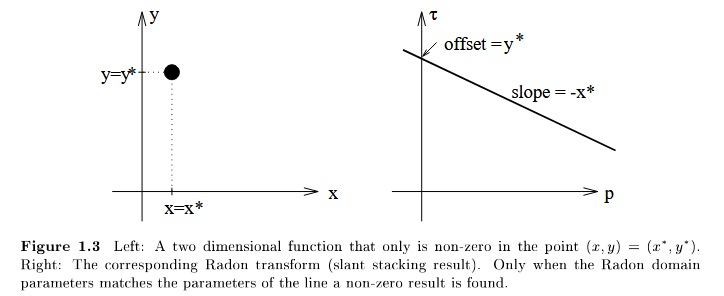

2. The image of a line $y = p^*x + \tau^*$ in $E^2$ is a point $(p^*, \tau^*)$ in the Radon plane. 

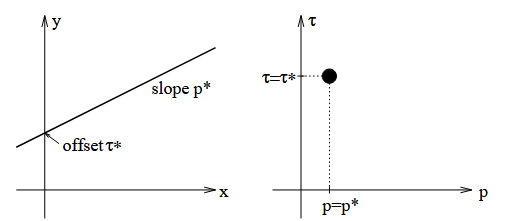

Both properties are simple to prove from the definition. 

We have reconstructed several lines between detectors A, B. Their Radon transforms will be points and can be calculated easily. 

If there are two sources, the points will lie on 2 lines - images of 2 points in $E^2$ representing the positionss of the two sources. 

As it may not be apparent what is the correct pair of lines, we will try all candidates and select the pair that gives the best least-squares fit. We implement the fit manually so that we can use uncertainties random variables and have good error estimates for our results.

In [ ]:
def least_squares_solution(a1, b1, c1, a2, b2, c2, a3, b3, c3):
    '''
    Given 3 lines, a1*x + b1*y = c1, a2*x + b2*y = c2, a3*x + b3*y = c3, find their intersection 
    in the least-squares sense - that is, solve the system of 3 equations for the unknowns x, y.
    :param a1, ... c3 scalars, coefficients of the 3 equations
    :return (x,y) Least-squares estimates of x, y.
    Note: no least-squares routine is called so that a1, ... c3 can be uncertainties random variables. 
    TODO: this only works with 3 lines, that is, measurements from 3 psi values.
    '''
    # Normalize (neutral operation)
    n1 = umath.sqrt(a1**2 + b1**2)
    a1 = a1 / n1
    b1 = b1 / n1
    c1 = c1 / n1
    n2 = umath.sqrt(a2**2 + b2**2)
    a2 = a2 / n2
    b2 = b2 / n2
    c2 = c2 / n2
    n3 = umath.sqrt(a3**2 + b3**2)
    a3 = a3 / n3
    b3 = b3 / n3
    c3 = c3 / n3

    # Compute components of AtA
    M11 = a1**2 + a2**2 + a3**2
    M12 = a1*b1 + a2*b2 + a3*b3
    M21 = M12  # Symmetric matrix
    M22 = b1**2 + b2**2 + b3**2

    # Compute determinant of AtA
    detM = M11 * M22 - M12 * M21

    # Compute Atc
    v1 = a1*c1 + a2*c2 + a3*c3
    v2 = b1*c1 + b2*c2 + b3*c3

    # Compute least-squares solution
    x = (M22 * v1 - M12 * v2) / detM
    y = (-M21 * v1 + M11 * v2) / detM

    chi2 = (c1 - a1*x - b1*y)**2 + (c2 - a2*x - b2*y)**2 + (c3 - a3*x - b3*y)**2

    return x, y, chi2


Construct all alternative combinations of points/lines that represent the two sources, and select the one that gives the best fit in the Hough plane. This requires some combinatorics.

In [ ]:
from itertools import permutations


contents = [] # Collecting keys A,B/C of lines for each psi
for psi in psi_vals:
    contents.append(list(lines[psi].keys()))
max_content = len(max(contents, key = len))
slices = [None] * len(psi_vals) # Collecting slices for alternative sets of pq lines
slices[0] = [contents[0]] # No permutation for the first psi
for i_psi in range(1, len(psi_vals)):
    if len(contents[i_psi]) == max_content:
        slices[i_psi] = list(permutations(contents[i_psi]))
    else:
        slices[i_psi] = list(product(contents[i_psi], repeat = max_content)) # if not enough values use product
print("Slices:")
print(slices)

pq_lines = [list(zip(*slice)) for slice in list(product(*slices))] # Combine slices to sets of lines
print("Possible sets of Hough space lines:")
print(pq_lines)

# Fund the set of lines with minimum chi2
min_set_chi2 = np.inf # minimum sum chi2 found for a set of lines
min_set_points = None
for ils, line_set in enumerate(pq_lines):
    total_chi2 = 0
    point_set = []
    for line in line_set:
        pq_points = []
        for i, psi in enumerate(psi_vals):
            a, b, c = lines[psi][line[i]]
            p = -a/b # Radon transform the line
            q = c/b
            pq_points.extend([p, 1, q])
        slope, intercept, chi2 = least_squares_solution(*pq_points)  # fit line in pq space
        total_chi2 += chi2  # chi2 as rv, we take mean later
        xy_point = (-slope, intercept)  # back to xy space
        point_set.append((*xy_point, chi2))
    if total_chi2.nominal_value < min_set_chi2:
        min_set_chi2 = total_chi2.nominal_value
        min_set_points = point_set.copy()
print("Minimum chi2 set:")
print(f"{min_set_chi2=}")
for x, y, chi2 in min_set_points:
    print(f"{x.nominal_value:.2f} +/- {x.std_dev:.2f}, {y.nominal_value:.2f} +/- {y.std_dev:.2f}, {chi2.nominal_value:.2f}")
    


Now we can plot all the stuff and make a nice table. 

In [ ]:
fig, ax = plt.subplots(figsize = [8.5, 8.5])
colors = sns.color_palette("husl", 3*len(psi_vals))
colors_1 = colors[::3]
colors_2 = colors[1::3]
for psi, color1, color2 in zip(psi_vals, colors_1, colors_2):
    a, b, c = lines[psi]["AB"]
    p = - a / b # slope, x-coordinae in Radon space
    tau = c / b # y-intercept, y-coordinate in Radon space
    plt.scatter([p.nominal_value], [tau.nominal_value], color = color1, s = 2, label = f"$\\psi = {psi}, AB$")
    confidence_ellipse(p, tau, ax, n_std = 1, edgecolor = color1, linewidth = 0.5)
    try:
        a, b, c = lines[psi]["AC"]
        p = - a / b
        tau = c / b
        plt.scatter([p.nominal_value], [tau.nominal_value], color = color2, s = 2, label = f"$\\psi = {psi}, AC$")
        confidence_ellipse(p, tau, ax, n_std = 1, edgecolor = color2, linewidth = 0.5)
    except KeyError:
        continue
point_set_colors = sns.color_palette("husl", len(min_set_points))
for i, (x, y, chi2) in enumerate(min_set_points):
    slope = -x.nominal_value
    intercept = y.nominal_value
    plt.axline((0, intercept), slope = slope, linewidth = 0.3, color = colors[i])
#ax.set_aspect("equal")
plt.xlabel("p")
plt.xlim(-20, 20)
plt.ylabel("q (cm)")
plt.ylim(-20, 20)
plt.legend(title = "$\\psi$ (⁰)")
plt.title("Lines through detectors A and B/C in Hough space")

In [ ]:
fig, ax = plt.subplots(figsize = [8.5, 8.5])
ax.scatter(skull_data["x"], skull_data["y"], marker = ".")
point_set_colors = sns.color_palette("husl", len(min_set_points))
for i, (x, y, chi2) in enumerate(min_set_points):
    plt.scatter([x.nominal_value], [y.nominal_value], s = 0.5, color = point_set_colors[i])
    confidence_ellipse(x, y, ax, n_std = 1, edgecolor = "black", linewidth = 0.5)
ax.set_aspect("equal")
plt.xlabel("x [cm]")
plt.xlim([-9, 9])
plt.ylabel("y [cm]")
plt.ylim([-6,6])
plt.title("Radon transform estimates of source positions")

In [ ]:
rows = []
for x, y, chi2 in min_set_points:
    rho = correlation_matrix([x, y])[0,1]
    rows.append({
        "x (cm)" : x.nominal_value,
        "𝑠ₓ (cm)" : x.std_dev,
        "y (cm)" : y.nominal_value,
        "𝑠ᵧ (cm)" : y.std_dev,
        "ρ" : rho
    })
radon_table = pd.DataFrame.from_records(rows)
radon_table.style.format(precision = 2).set_caption("Estimated position of sources by Radon transform")

### <span style="color:red">Concluding tasks</span>

Now it is your turn to draw proper conclusions from the measurement. 

- Was the Gaussian fit good? Can it be improved?
- Are the profiles Gaussian or is there a substantial deviation from gaussianity? Why?
- What is the precision of the measurement? Can we rely on errors of fit parameters?
- If the first source was kept in place from the first measurement - are the positions from the first and second measurements consistent<? 
- Is the result consistent with the first estimate using line crossings?
- Ask the instructor to open the skull mold for you. Using a ruler, measure the actual positions of positron sources. Do your measurements correspond to reality?
- How can we improve the precision/identification? Which would you prefer to get a better estimate of measurement precision:
    - Add another angular profile (measurement at another $\psi$), or
    - Measure angular profiles more thoroughly (longer axquisition time, smaller angular step)?
    - or another improvement?
- What if we had more radiation sources? What is the reasonable upper limit on the number of sources whose positions we can simulatenously measure?